<center>
<h1><span style="font-size:62px;font-family:Times New Roman,Times,serif"><tt>Credit Card Fraud Detection</tt></span></h1>
</center>
<br>


<h1><span style="font-size:20px;font-family:Times New Roman,Times,serif"><tt>Author: Jan Erish Baluca</tt></span></h1>
[**LinkedIn**](https://www.linkedin.com/in/jan-erish-baluca-099569103/)  
[**Portfolio on Github**](https://github.com/JanErish/Portfolio_von_Jan)  


<a id="desc"></a>

<center>
<h1><span style="font-size:48px;font-family:Times New Roman,Times,serif"><tt>Part II</tt></span></h1>
</center>

![Imgur](https://i.imgur.com/WADp795.png)
<center>
<h1><span style="font-size:48px;font-family:Times New Roman,Times,serif"><tt>EXTREME GRADIENT BOOSTING PIPELINE</tt></span></h1>
</center>
<br>
![Imgur](https://i.imgur.com/dwEyicL.png)
<center>
<h1><span style="font-size:6px;font-family:Times New Roman,Times,serif"><tt>image: Shutterstock</tt></span></h1>
</center>
<br>


This section will serve to demonstrate the following skills:
1. Object Oriented Programming: Building complex classes and functions
2. Data Preprocessing
3. Data pipeline (scikit-learn) building
4. Model tuning and cross-validation
5. XGBoost model creation

The end product will be a class or module for easily training XGBoost supervised machine learning models that:
* automatically preprocesses data
    * dealing with missing values
    * encoding categorical variables
    * resampling the dataset to deal with class imbalance and skewdness
    * normalizing features
    * reducing dimensionality
    * selecting important features
* automatically finds the best setting for a model to deal with a specific dataset through hyperparameter tuning
* automatically trains the model using the best parameters found
* automatically evaluates model performance through cross-validation

The advantages of using the class are:
* The end user will not have to backtrack through the source code to change very specific settings.
* The end user will not have to copy paste hundreds of lines of code everytime a model has to be trained.
* Preprocessing and training settings are all packed in each instance and are easy to access and modify.
* The end user will be able to calibrate the same specific configurations for all instances of the XGBoost_trainer with possibly one line, eliminating the need to calibate each one by one.
* The trainer is built from the ground up with expert knowledge: best-practices and conventions in the industry.


<center>
<h1><span style="font-size:38px;font-family:Times New Roman,Times,serif"><tt>!!work in progress!!</tt></span></h1>
</center>

In [1]:
# Importing the data and basic packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('creditcard.csv')
df = df.drop('Time', axis=1)
df.reset_index(inplace=True)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
index     284807 non-null int64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26    

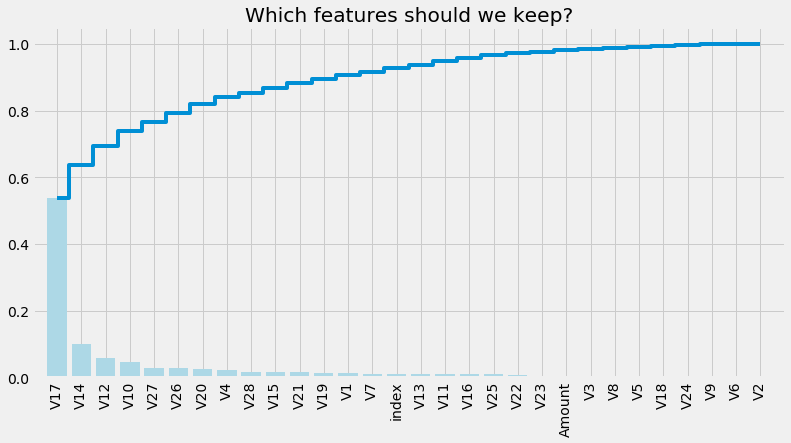

In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 6)

# Split into train and test sets
target_name = 'Class'
X = df.drop(target_name, axis =1)
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
y = pd.DataFrame(df[target_name])

# Is it recommended to stratify in order to keep the same proportion of 1s and 0s
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dtree = tree.DecisionTreeClassifier()
    #class_weight='balanced')
                                    #min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)

# Plot!

importances = dtree.feature_importances_
feat_names = df.drop(['Class'], axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Which features should we keep?")
plt.bar(range(len(indices)), importances[indices], color='lightblue', align='center')
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical', fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [4]:
# Drop unwanted features
team = feat_names[np.argsort(importances)[-4:]]
X = df[team]
print(X.info())

# Split into train and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 4 columns):
V10    284807 non-null float64
V12    284807 non-null float64
V14    284807 non-null float64
V17    284807 non-null float64
dtypes: float64(4)
memory usage: 8.7 MB
None


does not mean sklearn pipeline in the strictiest sense

actually a CLASS that contains an sklearn pipeline

combine Undersampler and Oversampler in one function using an if statement

# Pipeline Steps

### add option to input either a whole df or X and y
#### maybe also the option to input whole DF and then specify the target variable
* train_test_split(stratified) + conversion of sets to DMatrices
* transform data to dictionary
* Imputer
### how about missing values for categorical variables?????
* StandardScaler
* DictVectorizer
* AVOIDING DUMMY VARIABLE TRAP
* Function - Resampling (Undersampling or SMOTE)
* MAYBE Feature Selection
* Train Initial XGBoost Model
* Function: Hyperparameter Tuning using just the Training Set
    * GridSearchCV / RandomizedSearchCV
    * Training a new Model using best hyperparameters (return: tuned_model)
* Function: XGBoost Cross-validation

### Shorted tuning code
* by using nested ifs to determine the function name, parameter name, and parameter value

### target variable
* target is None, use the last column as y
* if it is provided, use that as y and drop it to form X

methods for the class:
.train()
.create()
.validate()
.train_create_validate()
.plot()
#### .classvariable_override()
* method for forcibly setting the new new cls.parameter given as the new self.parameter
#### .tune()
* class decorator as a method for changing the default class parameters

#### .preprocessor__
* attribute for extracting just the preprocessing pipeline

#### model evaluation has its own preprocessing pipeline fitted
* add an optional parameter in fit_transform for channeling an untouched trained model through the preprocessing pipeline until it hits the cross-validation step

# BUILD A FUNCTION FOR VISUALIZING DECISION BOUNDARIES

In [5]:
# import packages
import xgboost as xgb
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, minmax_scale, RobustScaler, \
                                    MaxAbsScaler, QuantileTransformer

C:\Users\JanErish\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
Positive_count = df.iloc[:,-1].sum()
Positive_count

492

In [7]:
#### define a function for undersampling
def Binary_Undersampler(df):
    """This class is applicable only on data for binary classification.
    This function assumes that 1 is the value of the underrepresented class."""
    Positive_count = df.iloc[:,-1].sum()
    Positive_indices = np.array(df[df.iloc[:,-1] ==1].index)
    Negative_indices = df[df.iloc[:,-1] == 0].index
    random_Negative_indices = np.array(np.random.choice(Negative_indices, Positive_count, replace = False))
    Undersample_indices = np.concatenate([Positive_indices, random_Negative_indices])
    Undersampled_df = df.loc[Undersample_indices,:]
    return Undersampled_df

In [8]:
X_train.head(5)

,V10,V12,V14,V17
265518,-0.157403,0.510277,-0.066555,-0.765670
180305,0.284864,0.325560,0.721068,-0.270842
42664,-2.009561,1.820161,0.122746,-0.724616
198723,1.756121,-0.722450,-0.195288,0.072781
82325,-0.558955,-0.054708,0.134659,-0.399525


In [9]:
# XGBoost Model Trainer (custom decorator function)

def XGBoost_Trainer(df, target=None, model= 'other', resampling=None,
                    booster="gbtree", objective="reg:linear",
                    test_size=0.2,
                    random_state=69,
                    normalization=True,
                    pca=False,
                    hyperparameter_test= "none",
                    cv_metric="rmse",
                    missing_values="NaN",
                    imputation_strategy="mean",
                    n_iter= 25,
                    hypertune_folds= 5,
                    cv_folds= 5,
                    scoring="neg_mean_squared_error",
                    grid_params = "preset",
                    random_params = "preset"):
    """This function requires the xgboost package to be imported as xgb."""
    
    if model == "Tree Regressor":
        bj = ['gbtree','reg:linear']
    elif model == "Linear Regressor":
        bj = ['gblinear','reg:linear']
    elif model == "Tree Classifier":
        bj = ['gbtree', 'reg:logistic']
    elif model == "Linear Classifier":
        bj = ['gblinear', 'reg:logistic']
    elif mode == 'other':
        bj = [booster, objective]
    
    grid_parameters = {}
    random_parameters = {}
    
    if grid_params == "preset":
        grid_params = grid_parameters
    if random_params == "preset":
        random_params == random_parameters
    
    regression_objectives=[]
    classification_objectives = ["reg:logistic"]

    # Data Preprocessing Pipeline Steps
    preprocessing_steps = [
            ("Imputer", Imputer(missing_values=missing_values, strategy= imputation_strategy, axis=0))
                            ]
    
    # Scaling
    if normalization == True:
        preprocessing_steps = preprocessing_steps + [
            ("Scaler", StandardScaler())
                            ]
    
    # Dummy Variable Creation
    class Dictionator:
        def __init__(self, orient="records"):
            self.orient = orient
        
        def fit(self, X, y):
            return self
    
        def transform(self, X, y):
            return X.to_dict(self.orient), y.to_dict(self.orient)
        
        def fit_transform(self, X, y):
            self.fit(X, y)
            return self.transform(X, y)
    
    
    preprocessing_steps = preprocessing_steps + [ 
        ("Encoder", FeatureUnion(
            [("Label",LabelEncoder()),
             ("Hot", OneHotEncoder())]))
                            ]  
    
    #### define a CLASS for undersampling
    class Binary_Undersampler:
        """This class is applicable only on data for binary classification.
        This class assumes that 1 is the value of the underrepresented class."""
        def fit(self, X, y):
            return self
    
        def transform(self, X, y):   
            self.Positive_count = y.values.sum()
            self.Positive_indices = np.array(y[y.iloc[:,-1] ==1].index)
            self.Negative_indices = y[y.iloc[:,-1] == 0].index
            self.random_Negative_indices = np.array(np.random.choice(self.Negative_indices, self.Positive_count,
                                                                     replace = False))
            self.Undersample_indices = np.concatenate([self.Positive_indices, self.random_Negative_indices])
            return X.loc[self.Undersample_indices,:], y.loc[self.Undersample_indices,:]
        
        def fit_transform(self, X, y):
            self.fit(X, y)
            return self.transform(X, y)

    
    # Resampling Method
    if objective in classification_objectives or model in ["Tree Classifier","Linear Classifier"]:
        if resampling == "Undersampling":
            preprocessing_steps = preprocessing_steps + [("The Undersampler", Binary_Undersampler())]
        elif resampling == "SMOTE":
            preprocessing_steps = preprocessing_steps + [("The Oversampler", SMOTE())]
            
    # Principal Component Analysis (PCA)
    if pca == True:
        preprocessing_steps = preprocessing_steps + [("PCA", PCA())]
    
    # Separating features and target
    X, y = df[df.columns.tolist()[:,-1]], df[df.columns.tolist()[-1]]
    
    # Split between test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    
    # Completing the pipeline with the appropriat XGBoost Model
    # correct version
    if bj[0] == "gblinear":
        DM_train = xgb.DMAtrix(data=X_train, label=y_train)
        if hyperparameter_test == "Grid Search":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Tuner", GridSearchCV(estimator=xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]),
                                      param_grid= grid_params,
                                      scoring= scoring,
                                      cv= hypertune_folds,
                                      verbose=1))
                        ]
        elif hyperparameter_test == "Random Search":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Tuner", RandomizedSearchCV(estimator=xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]),
                                                                param_distributions=random_parameters,
                                                                scoring= scoring,
                                                                cv = hypertune_folds,
                                                                n_iter= n_iter))
                        ]
        elif hyperparameter_test == "none":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Model", xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]))
                        ]
    
    elif bj[0] == "gbtree":
        if bj[1] in regression_objectives:
            if hyperparameter_test == "Grid Search":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Tuner", GridSearchCV(estimator=xgb.XGBRegressor(booster=bj[0], objective=bj[1]),
                                          param_grid= grid_params,
                                          scoring= scoring,
                                          cv= hypertune_folds,
                                          verbose=1))
                        ]
            elif hyperparameter_test == "Random Search":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Tuner", RandomizedSearchCV(estimator=xgb.XGBRegressor(booster=bj[0], objective=bj[1]),
                                                                           param_distributions=random_parameters,
                                                                           scoring= scoring,
                                                                           cv = hypertune_folds,
                                                                           n_iter= n_iter))
                        ]
            elif hyperparameter_test == "none":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Model", xgb.XGBRegressor(booster=bj[0], objective=bj[1]))
                        ]

        elif bj[1] in classification_objectives:
            if hyperparameter_test == "Grid Search":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Tuner", GridSearchCV(estimator=xgb.XGBClassifier(booster=bj[0], objective=bj[1]),
                                          param_grid= grid_params,
                                          scoring= scoring,
                                          cv= hypertune_folds,
                                          verbose=1))
                        ]
            elif hyperparameter_test == "Random Search":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Tuner", RandomizedSearchCV(estimator=xgb.XGBClassifier(booster=bj[0], objective=bj[1]),
                                                                           param_distributions=random_parameters,
                                                                           scoring= scoring,
                                                                           cv = hypertune_folds,
                                                                           n_iter= n_iter))
                        ]
            elif hyperparameter_test == "none":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Model", xgb.XGBClassifier(booster=bj[0], objective=bj[1]))
                        ]             
    
    
    
    # fitting the pipeline 
    pipeline.fit(X_train.to_dict("records"), y_train)
    
    if hyperparameter_test == "Grid Search" or hyperparameter_test == "Random Search":
        if bj[0] == "gblinear":
            xgb_model = xgb.XGBRegressor(booster="gbtree", objective="reg:linear", **pipeline.best_params_)
            xgb_model.fit(X_train, y_train)
        elif model == "Linear Regressor":
            xgb_model == xgb.train(booster="gblinear", objective='reg:linear', **pipeline.best_params_)
            xgb_model.fit(X_train, y_train)
        elif model == "Tree Classifier":
            xgb_model == XGBClassifier(booster="gbtree")
    


In [10]:
# Imputer class
# Imputer(missing_values=missing_values, strategy= imputation_strategy, axis=0)
# Imputer = imputer(missing_values = ‘NaN’, strategy = ‘mean’, axis = 0)
# Imputer = imputer.fit(x[:,1:3])
# X[:,1:3] = imputer.transform(x[:,1:3])


class Imputation_Nation:
        """This class automatically drops rows with missing data for a categorical target/dependent variable
        under the assumption that the data is Missing Completely at Random (MCAR)
        
        This class also handles the vectorization and creation of dummy variables for categorical independent variables."""
        classification_objectives = ["reg:logistic"]
        
        def __init__(self, missing_values='NaN', num_imput_strat='mean', cat_imput_strat='most_frequent', imputation_axis=0):
            self.missing_values = missing_values
            self.num_imput_strat = num_imput_strat
            self.cat_imput_strat = cat_imput_strat
            self.imputation_axis = imputation_axis
            
        def fit(self, X, y=None, test_model=None):
            return self
        
        def transform(self, X, y=None, test_model=None):
            if y is None:
                X = pd.DataFrame(X.drop(X.columns[[-1,]], axis=1))
                y = pd.DataFrame(X.iloc[:,-1])
                
            # drop rows that have missing dependent variable values
            null_indeces = pd.isnull(y).any(1).nonzero()[0]
            X_full = pd.DataFrame(X.drop(X.index[null_indeces]))
            y_full = pd.DataFrame(y.drop(y.index[null_indeces]))
                
            # identify categorical columns
            Cat_mask = X_full.dtypes == object
            Cat_cols = X_full.columns[Cat_mask].tolist()
            # identify numeric columns
            Num_cols = X_full.select_dtypes(exclude=['object']).columns.tolist()
                    
            # Encoding categorical columns
            X_full[Cat_cols] = X_full[Cat_cols].apply(lambda x: LabelEncoder().fit_transform(x.astype(str)))
                    
            # Imputing categorical data
            X_full[Cat_cols] = Imputer(missing_values= self.missing_values, strategy=self.cat_imput_strat, 
                                         axis=self.imputation_axis).fit_transform(X_full[Cat_cols])
                    
            # Creating dummy variables for categorical data
            X_full = OneHotEncoder(categorical_features=Cat_mask, sparse=False).fit_transform(X_full)
                    
            # Imputing numeric columns
            X_full[Num_cols] = Imputer(missing_values=self.missing_values,strategy=self.num_imput_strat, 
                                axis=self.imputation_axis).fit_transform(X_full[Num_cols])
            
            if objective in classification_objectives:
                # Encoding, Imputing and Creating Dummy Variables for a Categorical Dependent Variable
                if y_full.dtypes == object:
                    y_full = LabelEncoder().fit_transform(y_full.astype(str))
                
                y_full = OneHotEncoder(sparse=False).fit_transform(y_full)
                
                
            if test_model is None:
                return X_full, y_full
            return X_full, y_full, test_model
        
        def fit_transform(self, X, y=None, test_model=None):
            self.fit(X, y, test_model)
            # remember if y is None: concatenate X and y
            return self.transform(X, y, test_model)

In [11]:
# Feature Scaler

# init parameters should be adjustable as soon as the entire class is initiated
class Feature_Scaler:
    """Options for scaling methods (parameter "scale=") are the following:
        Normal, Standard, MinMax, Normal, Robust, MaxAbs, and Quantile.
        
        If the fit_transform method is given one positional argument (X), 
        the class assumes that it is a DataFrame with the last
        column as the target variable and the rest as the features."""
    def __init__(self, scale="Standard", copy=True, with_mean=True, with_std=True,
                feature_range=(0, 1),
                 norm='l2',
                 with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0),
                 n_quantiles=1000, output_distribution='uniform', ignore_implicit_zeros=False,
                 subsample=100000, random_state=69
                ):
        if scale == "Standard":
            self.copy = copy
            self.with_mean = with_mean
            self.with_std = with_std
            self.scale = StandardScaler(copy = self.copy, with_mean = self.with_mean, with_std = self.with_std)
        elif scale == "MinMax":
            self.feature_range= feature_range
            self.copy = copy
            self.scale = MinMaxScaler(feature_range = self.feature_range, copy = self.copy)
        elif scale == "Normal":
            self.norm = norm
            self.copy = copy
            self.scale = Normalizer(norm = self.norm, copy = self.copy)
        elif scale == "Robust":
            self.with_centering = with_centering
            self.with_scaling = with_scaling
            self.quantile_range = quantile_range
            self.copy = copy
            self.scale = RobustScaler(with_centering = self.with_centering, with_scaling = self.with_scaling,
                                     quantile_range=self.quantile_range, copy=self.copy)
        elif scale == "MaxAbs":
            self.copy = copy
            self.scale == MaxAbsScaler(copy=self.copy)
        elif scale == "Quantile":
            self.n_quantiles = n_quantiles
            self.output_distribution = output_distribution
            self.ignore_implicit = ignore_implicit
            self.subsample = subsample
            self.random_state = random_state
            self.copy = copy
            self.scale == QuantileTransformer(n_quantiles=self.n_quantiles, output_distribution=self.output_distribution,
                                             ignore_implicit=self.ignore_implicit, subsample=self.subsample,
                                             random_state=self.random_state)
    
    def fit(self, X, y=0):
        return self
    
    def transform(self, X, y=0):
        if y == 0:
            return pd.concat([pd.DataFrame(self.scale.fit_transform(X.drop(df.columns[[-1,]], axis=1))), \
                              pd.DataFrame(X.iloc[:,[0]])], \
                        axis=1)
        return pd.DataFrame(self.scale.fit_transform(X)), pd.DataFrame(y)
    
    def fit_transform(self, X, y=0):
        self.fit(X, y)
        return self.transform(X, y)

In [12]:
class Binary_Undersampler:
    """This class is applicable only on data for binary classification.
    This function assumes that 1 is the value of the underrepresented class."""
    def fit(self, X, y):
        return self
    
    def transform(self, X, y):   
        Positive_count = y.values.sum()
        Positive_indices = np.array(y[y.iloc[:,-1] ==1].index)
        Negative_indices = y[y.iloc[:,-1] == 0].index
        random_Negative_indices = np.array(np.random.choice(Negative_indices, Positive_count, 
                                                                 replace = False))
        Undersample_indices = np.concatenate([Positive_indices, random_Negative_indices])
        return X.loc[Undersample_indices,:], y.loc[Undersample_indices,:]
        
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X, y)

In [13]:
# Class for transforming to dictionary

class Dictionator:
    def __init__(self, orient="records"):
        self.orient = orient
        
    def fit(self, X, y):
        return self
    
    def transform(self, X, y):
        return X.to_dict(self.orient), y.to_dict(self.orient)
        
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X, y)
        
        

        
# Class for transforming to DMatrix

In [14]:
class Dictionator:
    classification_objectives = ["reg:logistic"]
    
    def __init__(self, orient="records", objective="reg:linear"):
        self.orient = orient
        self.objective = objective
        
    def fit(self, X, y):
        return self
    
    def transform(self, X, y):
        if self.objective in self.classification_objectives:
            return X.to_dict(self.orient), y.to_dict(self.orient)
        return X.to_dict(self.orient), y
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X, y)


In [15]:
# Dummy Variable-creator class
class Dummynatrix:
    classification_objectives = ["reg:logistic"]
        
    def __init__(self, sparse=False, objective="reg:linear"):
        self.sparse = sparse
        self.objective = objective
            
    def fit(self, X, y):
        return self
        
    def transform(self, X, y):
        if self.objective in self.classification_objectives:
            return DictVectorizer(sparse=self.sparse).fit_transform(X), \
                        DictVectorizer(sparse=self.sparse).fit_transform(y)
        return DictVectorizer(sparse=self.sparse).fit_transform(X), y
        
    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X, y)

In [16]:
# Class for transforming to DMatrix
class DMatrix_Reloader:
    
    def fit(self, data, label):
        return self
    
    def transform(self, data, label):
        return xgb.DMatrix(data= data, label= label )
    
    def fit_transform(self, data, label):
        self.fit(data, label)
        return self.transform(data, label)

In [17]:
# instantiate pipeline: Tree Booster
pipeline = [
    ("Imputer", Imputer(missing_values=missing_vals, strategy= imput_strat,axis=0)),
    ("Scaler", StandardScaler()),
    ("Dictifier", DictVectorizer()),
    ("Tuner", )
            ]

    # Convert to dictionaries
    X_train, y_train, X_test, y_test = X_train.to_dict('records'),
                                        y_train.to_dict('records'),
                                        X_test.to_dict('records'),
                                        y_test.to_dict('records')

                # GBLINEAR INCOMPATIBLE WITH SKLEARN CROSS-VALIDATION
                    if hyperparameter_test == "Grid Search":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Tuner", GridSearchCV(estimator=xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]),
                                      param_grid= grid_params,
                                      scoring= scoring,
                                      cv= hypertune_folds,
                                      verbose=1))
                        ]
        elif hyperparameter_test == "Random Search":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Tuner", RandomizedSearchCV(estimator=xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]),
                                                                param_distributions=random_parameters,
                                                                scoring= scoring,
                                                                cv = hypertune_folds,
                                                                n_iter= n_iter))
                        ]
        elif hyperparameter_test == "none":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Model", xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [ ]:
# XGBoost Model Trainer: IF statement version

def XGBTree_Oversample_Trainer(df, metrics="rmse"):

# Use SMOTE

# UNDERSAMPLED DATA SHOULD NOT OVERWRITE THE ORIGINAL DATA which should probably be used for model evaluation

## try testing the model on the negatives from the original that were removed (!= random_Negative_indices)
## Try to include (!= random_Negative_indices in the test set ONLY)
### pd.concat from the original_df



#### Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

#### Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

#### Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

#### Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

#### Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

#### Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

In [ ]:
# COPY
# XGBoost Model Trainer (custom decorator function)

def XGBoost_Trainer(df, target=None, model= 'other', resampling=None,
                    booster="gbtree", objective="reg:linear",
                    test_size=0.2,
                    random_state=69,
                    normalization=True,
                    pca=False,
                    hyperparameter_test= "none",
                    cv_metric="rmse",
                    missing_values="NaN",
                    imputation_strategy="mean",
                    n_iter= 25,
                    hypertune_folds= 5,
                    cv_folds= 5,
                    scoring="neg_mean_squared_error",
                    grid_params = "preset",
                    random_params = "preset"):
    """This function requires the xgboost package to be imported as xgb."""
    
    if model == "Tree Regressor":
        bj = ['gbtree','reg:linear']
    elif model == "Linear Regressor":
        bj = ['gblinear','reg:linear']
    elif model == "Tree Classifier":
        bj = ['gbtree', 'reg:logistic']
    elif model == "Linear Classifier":
        bj = ['gblinear', 'reg:logistic']
    elif mode == 'other':
        bj = [booster, objective]
    
    grid_parameters = {}
    random_parameters = {}
    
    if grid_params == "preset":
        grid_params = grid_parameters
    if random_params == "preset":
        random_params == random_parameters
    
    regression_objectives=[]
    classification_objectives = ["reg:logistic"]

    # Data Preprocessing Pipeline Steps
    preprocessing_steps = [
            ("Imputer", Imputer(missing_values=missing_values, strategy= imputation_strategy, axis=0))
                            ]
    
    # Scaling
    if normalization == True:
        preprocessing_steps = preprocessing_steps + [
            ("Scaler", StandardScaler())
                            ]
    
    # Dummy Variable Creation
    class Dictionator:
        def __init__(self, orient="records"):
            self.orient = orient
        
        def fit(self, X, y):
            return self
    
        def transform(self, X, y):
            return X.to_dict(self.orient), y.to_dict(self.orient)
        
        def fit_transform(self, X, y):
            self.fit(X, y)
            return self.transform(X, y)
    
    
    preprocessing_steps = preprocessing_steps + [ 
        ("Encoder", FeatureUnion(
            [("Label",LabelEncoder()),
             ("Hot", OneHotEncoder())]))
                            ]  
    
    #### define a CLASS for undersampling
    class Binary_Undersampler:
        """This class is applicable only on data for binary classification.
        This class assumes that 1 is the value of the underrepresented class."""
        def fit(self, X, y):
            return self
    
        def transform(self, X, y):   
            self.Positive_count = y.values.sum()
            self.Positive_indices = np.array(y[y.iloc[:,-1] ==1].index)
            self.Negative_indices = y[y.iloc[:,-1] == 0].index
            self.random_Negative_indices = np.array(np.random.choice(self.Negative_indices, self.Positive_count,
                                                                     replace = False))
            self.Undersample_indices = np.concatenate([self.Positive_indices, self.random_Negative_indices])
            return X.loc[self.Undersample_indices,:], y.loc[self.Undersample_indices,:]
        
        def fit_transform(self, X, y):
            self.fit(X, y)
            return self.transform(X, y)

    
    # Resampling Method
    if objective in classification_objectives or model in ["Tree Classifier","Linear Classifier"]:
        if resampling == "Undersampling":
            preprocessing_steps = preprocessing_steps + [("The Undersampler", Binary_Undersampler())]
        elif resampling == "SMOTE":
            preprocessing_steps = preprocessing_steps + [("The Oversampler", SMOTE())]
            
    # Principal Component Analysis (PCA)
    if pca == True:
        preprocessing_steps = preprocessing_steps + [("PCA", PCA())]
    
    # Separating features and target
    X, y = df[df.columns.tolist()[:,-1]], df[df.columns.tolist()[-1]]
    
    # Split between test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    
    # Completing the pipeline with the appropriat XGBoost Model
    # correct version
    if bj[0] == "gblinear":
        DM_train = xgb.DMAtrix(data=X_train, label=y_train)
        if hyperparameter_test == "Grid Search":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Tuner", GridSearchCV(estimator=xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]),
                                      param_grid= grid_params,
                                      scoring= scoring,
                                      cv= hypertune_folds,
                                      verbose=1))
                        ]
        elif hyperparameter_test == "Random Search":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Tuner", RandomizedSearchCV(estimator=xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]),
                                                                param_distributions=random_parameters,
                                                                scoring= scoring,
                                                                cv = hypertune_folds,
                                                                n_iter= n_iter))
                        ]
        elif hyperparameter_test == "none":
            pipeline = Pipeline[
                preprocessing_steps,
                ("Model", xgb.train(dtrain=DM_train, booster=bj[0], objective=bj[1]))
                        ]
    
    elif bj[0] == "gbtree":
        if bj[1] in regression_objectives:
            if hyperparameter_test == "Grid Search":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Tuner", GridSearchCV(estimator=xgb.XGBRegressor(booster=bj[0], objective=bj[1]),
                                          param_grid= grid_params,
                                          scoring= scoring,
                                          cv= hypertune_folds,
                                          verbose=1))
                        ]
            elif hyperparameter_test == "Random Search":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Tuner", RandomizedSearchCV(estimator=xgb.XGBRegressor(booster=bj[0], objective=bj[1]),
                                                                           param_distributions=random_parameters,
                                                                           scoring= scoring,
                                                                           cv = hypertune_folds,
                                                                           n_iter= n_iter))
                        ]
            elif hyperparameter_test == "none":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Model", xgb.XGBRegressor(booster=bj[0], objective=bj[1]))
                        ]

        elif bj[1] in classification_objectives:
            if hyperparameter_test == "Grid Search":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Tuner", GridSearchCV(estimator=xgb.XGBClassifier(booster=bj[0], objective=bj[1]),
                                          param_grid= grid_params,
                                          scoring= scoring,
                                          cv= hypertune_folds,
                                          verbose=1))
                        ]
            elif hyperparameter_test == "Random Search":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Tuner", RandomizedSearchCV(estimator=xgb.XGBClassifier(booster=bj[0], objective=bj[1]),
                                                                           param_distributions=random_parameters,
                                                                           scoring= scoring,
                                                                           cv = hypertune_folds,
                                                                           n_iter= n_iter))
                        ]
            elif hyperparameter_test == "none":
                pipeline = Pipeline[
                    preprocessing_steps,
                    ("Model", xgb.XGBClassifier(booster=bj[0], objective=bj[1]))
                        ]             
    
    
    
    # fitting the pipeline 
    pipeline.fit(X_train.to_dict("records"), y_train)
    
    if hyperparameter_test == "Grid Search" or hyperparameter_test == "Random Search":
        if bj[0] == "gblinear":
            xgb_model = xgb.XGBRegressor(booster="gbtree", objective="reg:linear", **pipeline.best_params_)
            xgb_model.fit(X_train, y_train)
        elif model == "Linear Regressor":
            xgb_model == xgb.train(booster="gblinear", objective='reg:linear', **pipeline.best_params_)
            xgb_model.fit(X_train, y_train)
        elif model == "Tree Classifier":
            xgb_model == XGBClassifier(booster="gbtree")

            
                    return pd.concat([pd.DataFrame(Imputer(missing_values= self.missing_values,
                                                           strategy=self.num_imput_strat,\
                                   axis=self.imputation_axis).fit_transform(X.drop(df.columns[[-1,]], axis=1)\
                                                    .drop(X.index[pd.isnull(X.iloc[:,-1]).any(1).nonzero()[0]]))), \
                                pd.DataFrame(X.iloc[:,-1]).dropna()], axis=1)
